In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
import pandas as pd

# list of categorical variables
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                         'PhoneService', 'MultipleLines', 'InternetService',
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 'PaymentMethod']

# unique values for each categorical variable
for variable in categorical_variables:
    unique_values = data[variable].unique()
    print(f"Unique values for {variable}: {unique_values}")
    print("-" * 40) 


Unique values for gender: ['Female' 'Male']
----------------------------------------
Unique values for SeniorCitizen: [0 1]
----------------------------------------
Unique values for Partner: ['Yes' 'No']
----------------------------------------
Unique values for Dependents: ['No' 'Yes']
----------------------------------------
Unique values for PhoneService: ['No' 'Yes']
----------------------------------------
Unique values for MultipleLines: ['No phone service' 'No' 'Yes']
----------------------------------------
Unique values for InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Unique values for OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------
Unique values for OnlineBackup: ['Yes' 'No' 'No internet service']
----------------------------------------
Unique values for DeviceProtection: ['No' 'Yes' 'No internet service']
----------------------------------------
Unique values for TechSupport: ['No' 'Yes' 'N

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# variables (features) present in the dataset
variables = data.columns
print("Variables in the dataset:", variables)

Variables in the dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
# deleted "automatic" from Payment Method
data["PaymentMethod"] = data["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [17]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

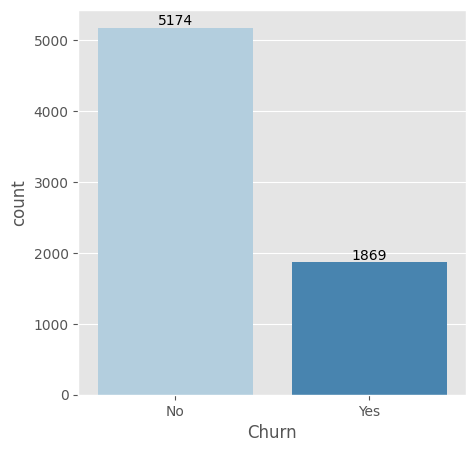

In [19]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = data["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

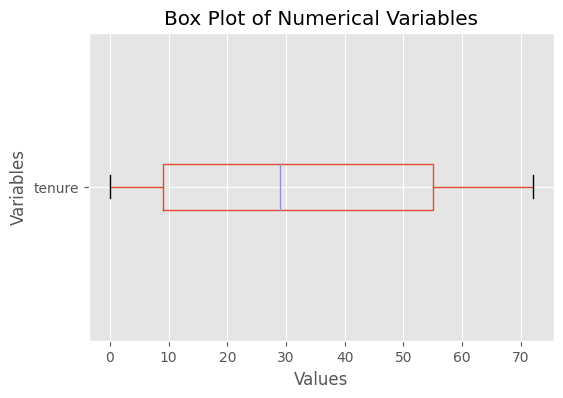

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_variables = ['tenure']

# box plots for each numerical variable
plt.figure(figsize=(6, 4))
data[numerical_variables].boxplot(sym='o', vert=False)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()


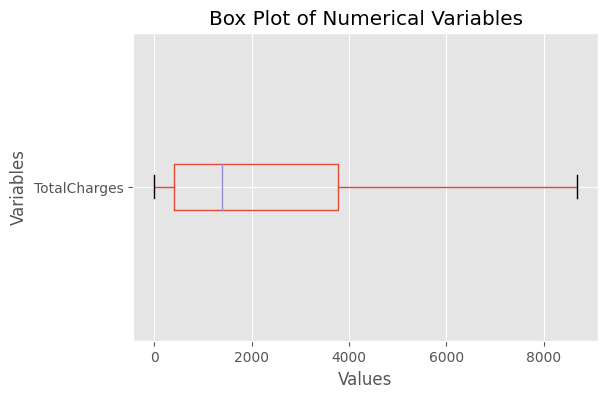

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_variables = ['TotalCharges']

# box plots for each numerical variable
plt.figure(figsize=(6, 4))
data[numerical_variables].boxplot(sym='o', vert=False)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

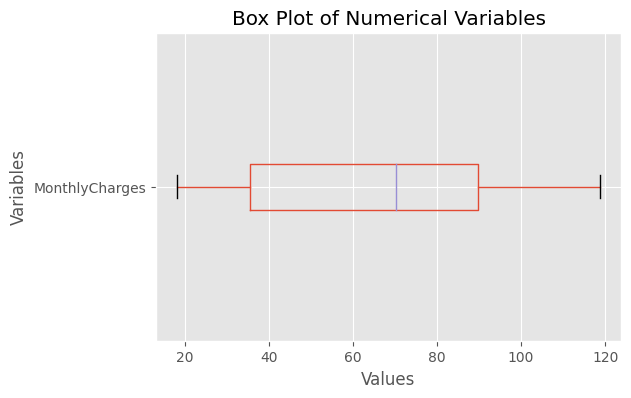

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_variables = ['MonthlyCharges']

# box plots for each numerical variable
plt.figure(figsize=(6, 4))
data[numerical_variables].boxplot(sym='o', vert=False)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

In [21]:
import pandas as pd
import numpy as np

numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

#  z-scores for each numerical variable
z_scores = (data[numerical_variables] - data[numerical_variables].mean()) / data[numerical_variables].std()

# Display z-scores
print("Z-Scores:")
print(z_scores)


Z-Scores:
      MonthlyCharges TotalCharges    tenure
0          -1.160241          NaN -1.277354
1          -0.259611          NaN  0.066323
2          -0.362635          NaN -1.236636
3          -0.746482          NaN  0.514215
4           0.197351          NaN -1.236636
...              ...          ...       ...
7038        0.665945          NaN -0.340852
7039        1.277443          NaN  1.613587
7040       -1.168549          NaN -0.870179
7041        0.320315          NaN -1.155201
7042        1.358865          NaN  1.369282

[7043 rows x 3 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_13320\1380295259.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (data[numerical_variables] - data[numerical_variables].mean()) / data[numerical_variables].std()
C:\Users\PC\AppData\Local\Temp\ipykernel_13320\1380295259.py:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (data[numerical_variables] - data[numerical_variables].mean()) / data[numerical_variables].std()


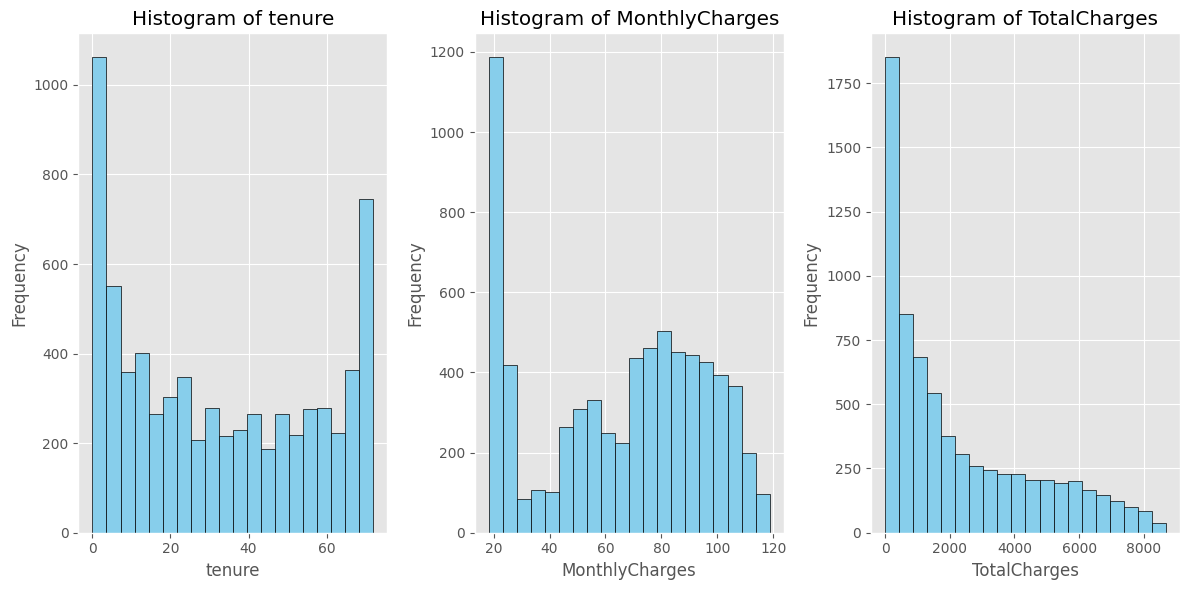

Descriptive Statistics for Numerical Variables:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical variables
numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Descriptive statistics
numerical_stats = data[numerical_variables].describe()

# Histograms
plt.figure(figsize=(12, 6))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(1, 3, i)
    plt.hist(data[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)


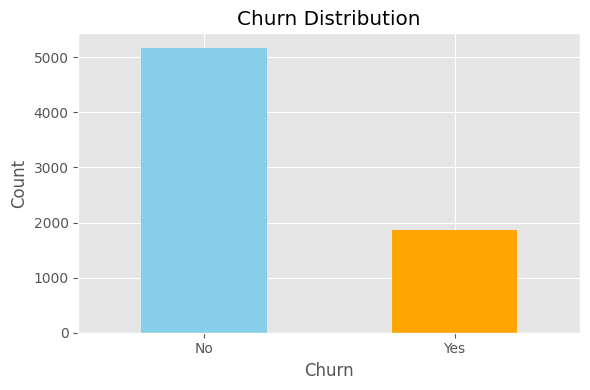

Churn Distribution:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate churn distribution
churn_distribution = data['Churn'].value_counts()

plt.figure(figsize=(6, 4))
churn_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

print("Churn Distribution:")
print(churn_distribution)


In [31]:
import pandas as pd

# Calculate churn rate
total_customers = len(data)
churned_customers = data['Churn'].value_counts()['Yes']
churn_rate = (churned_customers / total_customers) * 100

# Present churn rate
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.54%


Gender Distribution and Churn Rates:
Churn     No  Yes  Churn Rate (%)
gender                           
Female  2549  939       26.920872
Male    2625  930       26.160338


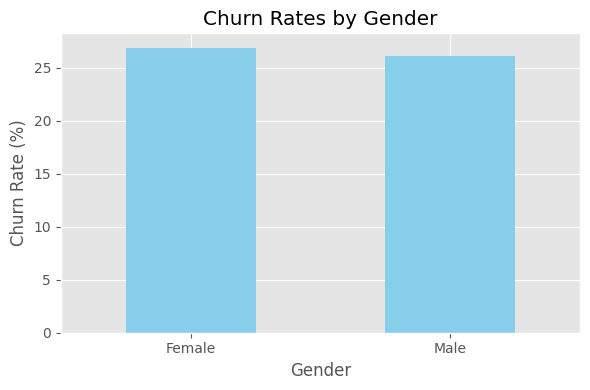

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze gender distribution and churn rates
gender_churn = data.groupby(['gender', 'Churn']).size().unstack()

# Calculate churn rates
gender_churn['Churn Rate (%)'] = (gender_churn['Yes'] / (gender_churn['Yes'] + gender_churn['No'])) * 100

# Display the results
print("Gender Distribution and Churn Rates:")
print(gender_churn)

# Create a bar chart for churn rates by gender
plt.figure(figsize=(6, 4))
gender_churn['Churn Rate (%)'].plot(kind='bar', color='skyblue')
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Churn Rates by Senior Citizenship:
Churn            No   Yes  Churn Rate (%)
SeniorCitizen                            
0              4508  1393       23.606168
1               666   476       41.681261


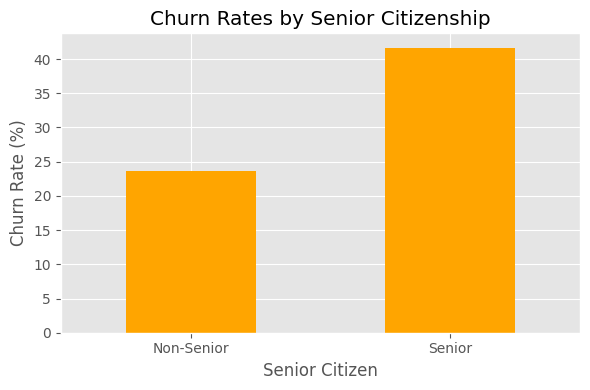

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze churn rates for senior citizens vs. non-senior citizens
age_churn = data.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate churn rates
age_churn['Churn Rate (%)'] = (age_churn['Yes'] / (age_churn['Yes'] + age_churn['No'])) * 100

# Display the results
print("Churn Rates by Senior Citizenship:")
print(age_churn)

# Create a bar chart for churn rates by senior citizenship
plt.figure(figsize=(6, 4))
age_churn['Churn Rate (%)'].plot(kind='bar', color='orange')
plt.title('Churn Rates by Senior Citizenship')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate (%)')
plt.xticks([0, 1], ['Non-Senior', 'Senior'], rotation=0)
plt.tight_layout()
plt.show()

Churn Behavior based on Partners and Dependents:
Churn                 No   Yes  Churn Rate (%)
Partner Dependents                            
No      No          2157  1123       34.237805
        Yes          284    77       21.329640
Yes     No          1233   420       25.408348
        Yes         1500   249       14.236707


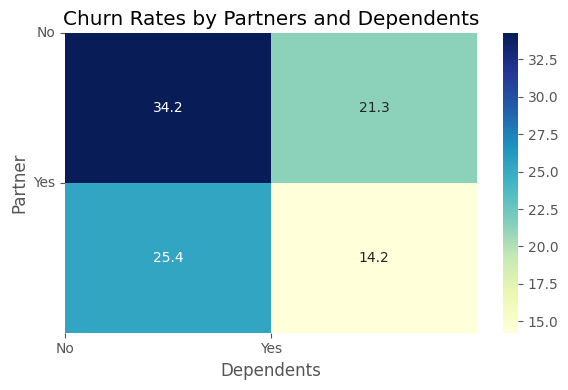

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze churn behavior based on partners and dependents
partner_dependent_churn = data.groupby(['Partner', 'Dependents', 'Churn']).size().unstack()

partner_dependent_churn['Churn Rate (%)'] = (partner_dependent_churn['Yes'] /(partner_dependent_churn['Yes'] + partner_dependent_churn['No'])) * 100
print("Churn Behavior based on Partners and Dependents:")
print(partner_dependent_churn)
plt.figure(figsize=(6, 4))
sns.heatmap(partner_dependent_churn['Churn Rate (%)'].unstack(), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Churn Rates by Partners and Dependents')
plt.xlabel('Dependents')
plt.ylabel('Partner')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.yticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()


Service Usage Analysis

Churn Behavior based on Phone Services and Multiple Lines:
Churn                            No  Yes  Churn Rate (%)
PhoneService MultipleLines                              
No           No phone service   512  170       24.926686
Yes          No                2541  849       25.044248
             Yes               2121  850       28.609896


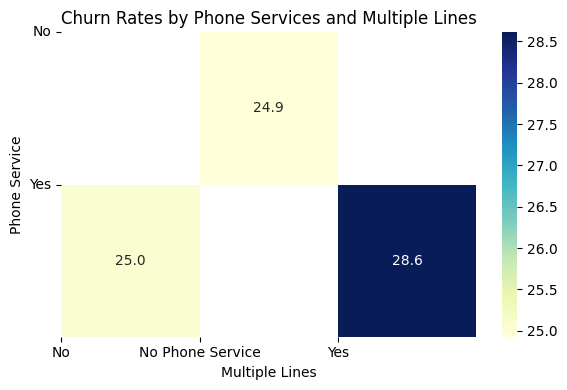

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

phone_service_churn = data.groupby(['PhoneService', 'MultipleLines', 'Churn']).size().unstack()
phone_service_churn['Churn Rate (%)'] = (phone_service_churn['Yes'] /
                                         (phone_service_churn['Yes'] + phone_service_churn['No'])) * 100
print("Churn Behavior based on Phone Services and Multiple Lines:")
print(phone_service_churn)
plt.figure(figsize=(6, 4))
sns.heatmap(phone_service_churn['Churn Rate (%)'].unstack(), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Churn Rates by Phone Services and Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Phone Service')
plt.xticks([0, 1, 2], ['No', 'No Phone Service', 'Yes'], rotation=0)
plt.yticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

No data for 'No Phone Service' category found.


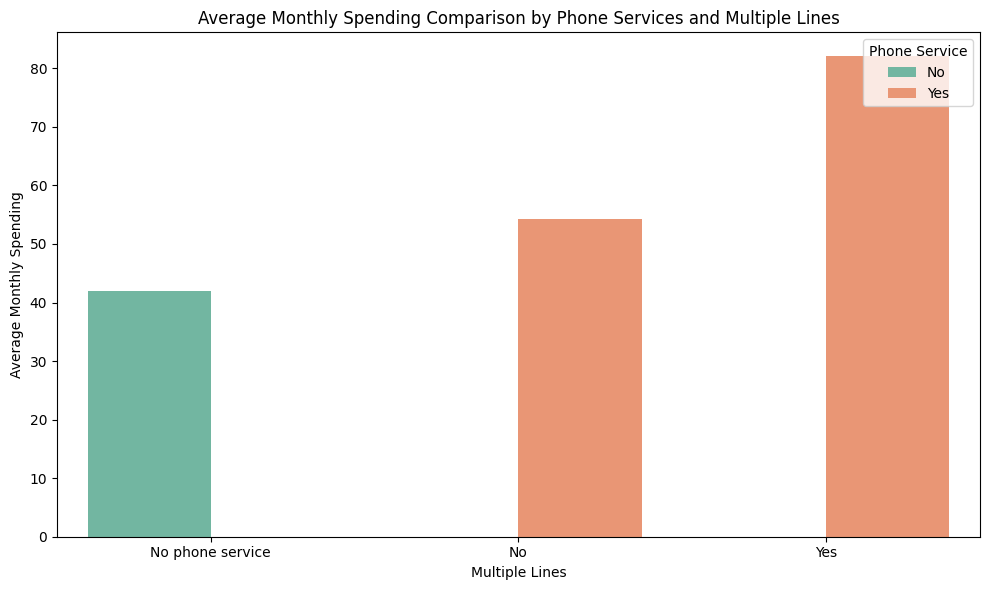

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded into the 'data' DataFrame

# Group the data by PhoneService and MultipleLines and calculate the average monthly spending
avg_monthly_spending = data.groupby(['PhoneService', 'MultipleLines'])['MonthlyCharges'].mean().reset_index()

# Check if the "No Phone Service" category exists in the dataset
if 'No Phone Service' in avg_monthly_spending['MultipleLines'].values:
    # Calculate the reference value for "No Phone Service" category
    reference_value = avg_monthly_spending[avg_monthly_spending['MultipleLines'] == 'No Phone Service']['MonthlyCharges'].values[0]
    
    # Calculate the percentage change compared to the reference
    avg_monthly_spending['PercentageChange'] = ((avg_monthly_spending['MonthlyCharges'] - reference_value) / reference_value) * 100
else:
    print("No data for 'No Phone Service' category found.")

# Create a bar plot to compare average monthly spending
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_monthly_spending, x='MultipleLines', y='MonthlyCharges', hue='PhoneService', palette='Set2')
plt.xlabel('Multiple Lines')
plt.ylabel('Average Monthly Spending')
plt.title('Average Monthly Spending Comparison by Phone Services and Multiple Lines')
plt.legend(title='Phone Service', loc='upper right')

# Display percentage results above the bars if available
if 'PercentageChange' in avg_monthly_spending.columns:
    for index, row in avg_monthly_spending.iterrows():
        plt.text(index, row['MonthlyCharges'], f'{row["PercentageChange"]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

internet_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

internet_churn = data.groupby(internet_features + ['Churn']).size().unstack()
internet_churn['Churn Rate (%)'] = (internet_churn['Yes'] /
                                    (internet_churn['Yes'] + internet_churn['No'])) * 100

print("Churn Behavior based on Internet Service and Related Features:")
print(internet_churn)



Churn Behavior based on Internet Service and Related Features:
Churn                                                                                                                                        No  \
InternetService OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies               
DSL             No                  No                  No                  No                  No                  No                    173.0   
                                                                                                                    Yes                    22.0   
                                                                                                Yes                 No                     23.0   
                                                                                                                    Yes                    22.0   
                                                       

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

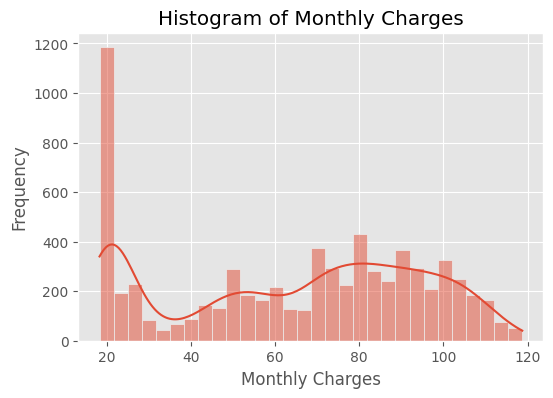

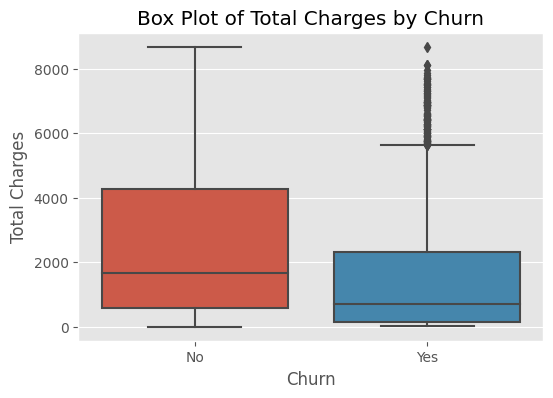

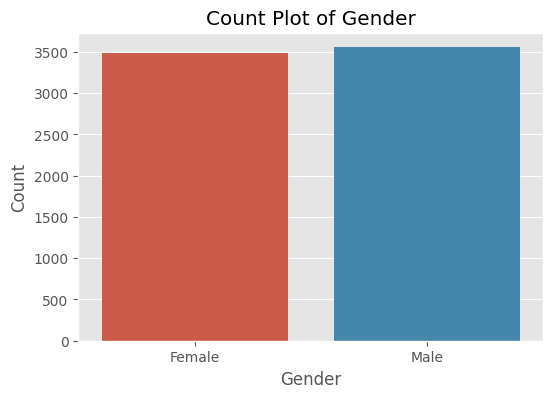

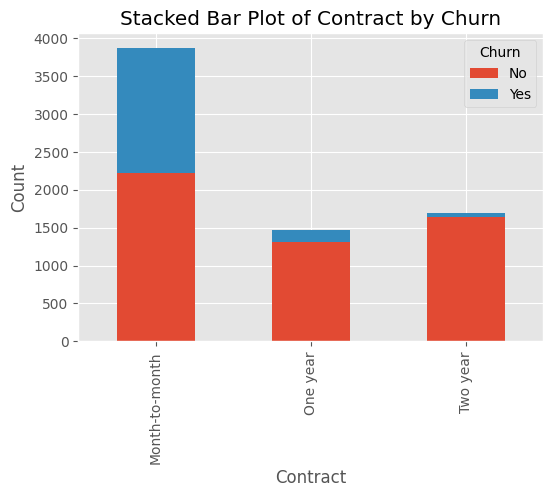

C:\Users\PC\AppData\Local\Temp\ipykernel_13320\1419792062.py:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


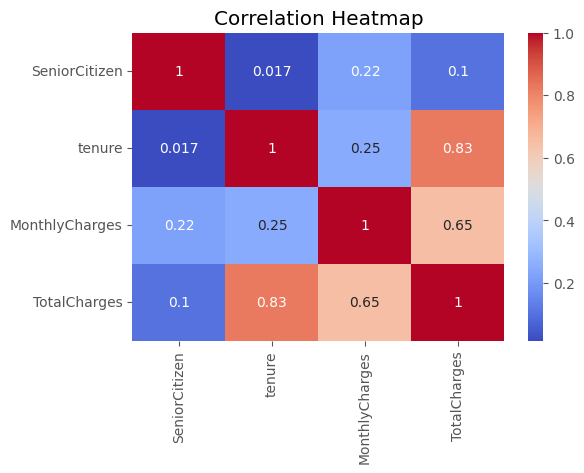

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Histogram of MonthlyCharges
plt.figure(figsize=(6, 4))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Box plot of TotalCharges by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Box Plot of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Count plot of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Stacked bar plot of Contract by Churn
contract_churn = data.groupby(['Contract', 'Churn']).size().unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Stacked Bar Plot of Contract by Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
